In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [493]:
def sum_(x):
    sum_ = []
    for i in range(len(x)):
        sum_.append(sum(x[0:i]))
    return sum_

In [515]:
df = pd.read_csv("C:\\Users\\Utilisateur\\Desktop\\Football_prediction\\Win_Loose_Goals_Rate_and_Odds_Season_Season1920.csv")

In [514]:
df.Season.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [516]:
list_feat = ['HomeTeam', 'AwayTeam', 'B365H', 'B365D', 'B365A', 'WHH', 'WHD',
             'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
             'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx2.5', 'BbAv2.5', 'BbMx_2.5',
             'BbAv_2.5', 'Log_B365', 'Gain_net', "Gain_brut", "Perte", "Season",
             'HomeScoredGoalsRate','HomeWinRate', 'AwayWinRate','HomeLooseRate',
             'AwayLooseRate','AwayScoredGoalsRate','HomeConcededGoalsRate', 'AwayConcededGoalsRate',
            "Journee"]

In [517]:
df_ = df[list_feat]

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


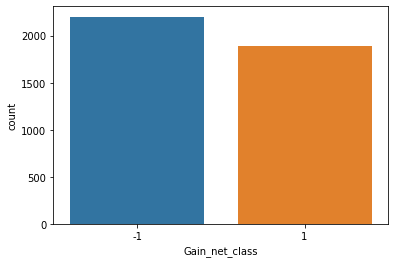

In [518]:
""" Creation du label Gain_net_class
Ce label vaut 1 si le gain_net est positif et -1 si le gain_net et null ou négatif"""
gain_net_class = []
for i in range(len(df_)):
    if df_["Gain_net"].iloc[i]>0:
        gain_net_class.append(1)
    else:
        gain_net_class.append(-1)
df_["Gain_net_class"] = gain_net_class
sns.countplot(df_["Gain_net_class"])

In [537]:
from sklearn.model_selection import train_test_split
Test = "Global" 
#Test = "Season"
N_season = 1
odd_max = +1.5
odd_min = -1.5
N_games = 10
N_split = N_games*N_season

if Test == "Global":

    X = df_.loc[(df_.Log_B365 < odd_max) & (df_.Log_B365 > odd_min)].drop(["Gain_net_class"],axis=1)
    Y = df_.loc[(df_.Log_B365 < odd_max) & (df_.Log_B365 > odd_min)].Gain_net_class
    X.fillna(value=0, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)#, random_state=0)
elif Test == "Season":
    X_train = df_.iloc[:-N_split,:].loc[(df_.iloc[:-N_split,:].Log_B365 < odd_max) & (df_.iloc[:-N_split,:].Log_B365 > odd_min)].drop(["Gain_net_class"],axis=1)
    X_test = df_.iloc[-N_split:,:].loc[(df_.iloc[-N_split:,:].Log_B365 < odd_max) & (df_.iloc[-N_split:,:].Log_B365 > odd_min)].drop(["Gain_net_class"],axis=1)
    y_train = df_.iloc[:-N_split,:].loc[(df_.iloc[:-N_split,:].Log_B365 < odd_max) & (df_.iloc[:-N_split,:].Log_B365 > odd_min)].Gain_net_class
    y_test = df_.iloc[-N_split:,:].loc[(df_.iloc[-N_split:,:].Log_B365 < odd_max) & (df_.iloc[-N_split:,:].Log_B365 > odd_min)].Gain_net_class
    X_train.fillna(value=0, inplace=True)
    X_test.fillna(value=0, inplace=True)


ratio_odd = len(df_.loc[(df_.Log_B365 < odd_max) & (df_.Log_B365 > odd_min)])/len(df_)
print("Pourcentage de matchs sélectionnés par rapport à leur odds = ", ratio_odd)

list_drop = ["Gain_net", "Gain_brut", "Perte", 'HomeTeam', 'AwayTeam', "Journee","Season",
            'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU','BbMx2.5',
             'BbAv2.5', 'BbMx_2.5', 'BbAv_2.5']

Pourcentage de matchs sélectionnés par rapport à leur odds =  0.7446183953033269


In [538]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=5000, C=10, solver='lbfgs', penalty='l2')
logit.fit(X_train.drop(list_drop,axis=1), y_train)
print("Train_score:", logit.score(X_train.drop(list_drop,axis=1), y_train), "Test_score:", logit.score(X_test.drop(list_drop,axis=1), y_test))

Train_score: 0.6621029572836802 Test_score: 0.6461412151067324


Gain_moyen_algo = 0.1490423617196072
Gain_moyen_all = -0.005985221674876843
Investissement total (avec algo) =  1035.5466766153072
Gain_brut total (avec algo) =  1217.08027318979
Gain_net total (avec algo) =  181.53359657448277
Rendement total (avec algo) =  0.17530218644303588
Investissement total (sans algo) =  1217
Gain_brut total (sans algo) =  1210.7099999999994
Gain_net total (sans algo) =  -6.290000000000646
Rendement total (sans algo) =  -0.005168447000822223


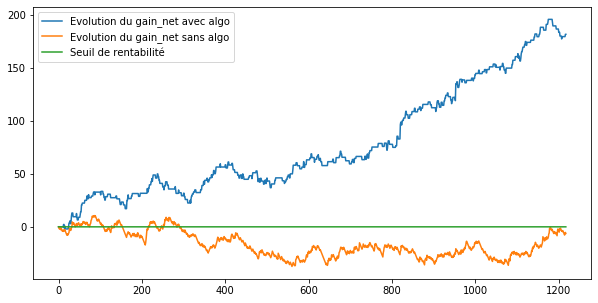

In [539]:
"""Calcul du gain_net avec algo"""
y_hat = logit.predict(X_test.drop(list_drop,axis=1))
y_hat_proba = logit.predict_proba(X_test.drop(list_drop,axis=1))
n = 5
m = 1
gain_net_algo = []
invest_algo = []
gain_brut_algo = []
for i in range(len(y_test)):
    if y_hat[i] == 1:
        
        invest_algo.append(m*n*y_hat_proba[i][1])
        
        if y_test.iloc[i] == 1:
            gain_net_algo.append(X_test["B365H"].iloc[i]*(m*n*y_hat_proba[i][1])-(m*n*y_hat_proba[i][1]))
            gain_brut_algo.append(X_test["B365H"].iloc[i]*(m*n*y_hat_proba[i][1]))
        else:
            gain_net_algo.append(-m*n*y_hat_proba[i][1])
            gain_brut_algo.append(0)
            
    elif y_hat[i] == -1:
        invest_algo.append(0)
        gain_net_algo.append(0)
        gain_brut_algo.append(0)

gain_net_no_algo = []
gain_brut_no_algo = []
invest_no_algo =[]

for i in range(len(y_test)):
    invest_no_algo.append(m)
    if y_test.iloc[i] == 1:
        gain_net_no_algo.append(X_test["B365H"].iloc[i]*m -m)
        gain_brut_no_algo.append(X_test["B365H"].iloc[i]*m)
    else:
        gain_net_no_algo.append(-m)
        gain_brut_no_algo.append(0)

print("Gain_moyen_algo =", np.mean(gain_net_algo))
print("Gain_moyen_all =", np.mean(gain_net_no_algo))
    
plt.figure(figsize=(10,5))
plt.plot(sum_(gain_net_algo), label= "Evolution du gain_net avec algo")
plt.plot(sum_(gain_net_no_algo), label= "Evolution du gain_net sans algo")
plt.plot(np.zeros(len(sum_(gain_net_algo))), label="Seuil de rentabilité")
plt.legend()

print("Investissement total (avec algo) = ", sum_(invest_algo)[-1])
print("Gain_brut total (avec algo) = ", sum_(gain_brut_algo)[-1])
print("Gain_net total (avec algo) = ", (sum_(gain_brut_algo)[-1]-sum_(invest_algo)[-1]))
print("Rendement total (avec algo) = ", (sum_(gain_brut_algo)[-1]-sum_(invest_algo)[-1])/sum_(invest_algo)[-1])
print("===================================================")
print("Investissement total (sans algo) = ", sum_(invest_no_algo)[-1])
print("Gain_brut total (sans algo) = ", sum_(gain_brut_no_algo)[-1])
print("Gain_net total (sans algo) = ", (sum_(gain_brut_no_algo)[-1]-sum_(invest_no_algo)[-1]))
print("Rendement total (sans algo) = ", (sum_(gain_brut_no_algo)[-1]-sum_(invest_no_algo)[-1])/sum_(invest_no_algo)[-1])

Investissement total (avec algo) =  147.77211619681702
Gain_brut total (avec algo) =  158.35996522152942
Gain_net total (avec algo) =  10.587849024712398
Rendement total (avec algo) =  0.07164984367287865
Investissement total (sans algo) =  208
Gain_brut total (sans algo) =  198.61000000000004
Gain_net total (sans algo) =  -9.389999999999958
Rendement total (sans algo) =  -0.04514423076923057


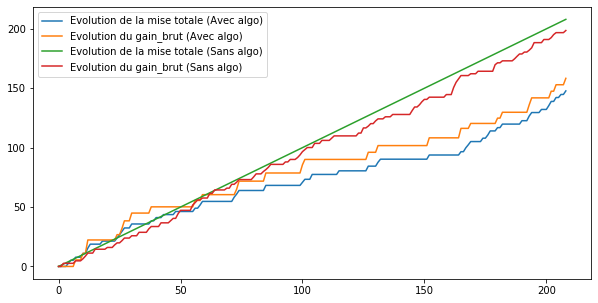

In [504]:
plt.figure(figsize=(10,5))
plt.plot(sum_(invest_algo), label="Evolution de la mise totale (Avec algo)")
plt.plot(sum_(gain_brut_algo), label="Evolution du gain_brut (Avec algo) ")
plt.legend()
print("Investissement total (avec algo) = ", sum_(invest_algo)[-1])
print("Gain_brut total (avec algo) = ", sum_(gain_brut_algo)[-1])
print("Gain_net total (avec algo) = ", (sum_(gain_brut_algo)[-1]-sum_(invest_algo)[-1]))
print("Rendement total (avec algo) = ", (sum_(gain_brut_algo)[-1]-sum_(invest_algo)[-1])/sum_(invest_algo)[-1])
print("===================================================")
plt.plot(sum_(invest_no_algo), label="Evolution de la mise totale (Sans algo)")
plt.plot(sum_(gain_brut_no_algo), label="Evolution du gain_brut (Sans algo) ")
plt.legend()
print("Investissement total (sans algo) = ", sum_(invest_no_algo)[-1])
print("Gain_brut total (sans algo) = ", sum_(gain_brut_no_algo)[-1])
print("Gain_net total (sans algo) = ", (sum_(gain_brut_no_algo)[-1]-sum_(invest_no_algo)[-1]))
print("Rendement total (sans algo) = ", (sum_(gain_brut_no_algo)[-1]-sum_(invest_no_algo)[-1])/sum_(invest_no_algo)[-1])

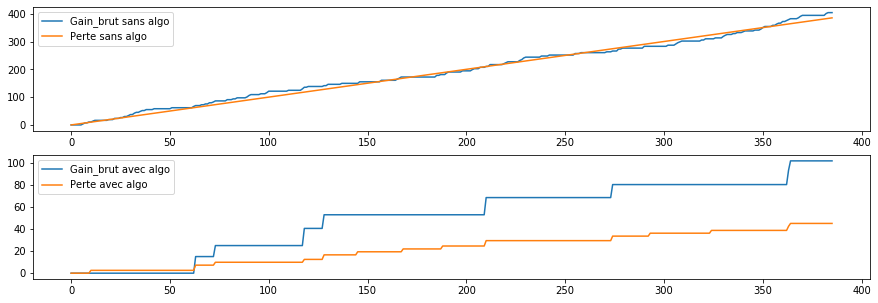

In [474]:
t = np.arange(0,len(X_test),1)

perte_ = []
gain_brut_ = []
for i in range(len(t)):
    if y_hat[i] == 1:
        perte_.append(n * y_hat_proba[i][1])
        if y_test.iloc[i] == 1:
            gain_brut_.append(X_test["B365H"].iloc[i]* n * y_hat_proba[i][1])
        else:
            gain_brut_.append(0)
    else:
        perte_.append(0)
        gain_brut_.append(0)

plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(t, sum_(X_test["Gain_brut"]), label="Gain_brut sans algo")
plt.plot(t, sum_(X_test["Perte"]), label="Perte sans algo")
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, sum_(gain_brut_), label="Gain_brut avec algo")
plt.plot(t, sum_(perte_), label="Perte avec algo")
plt.legend()

In [475]:
count=0
n_tot = len(y_hat)
for i in range(n_tot):
    if y_hat[i] == 1:
        count+= 1
ratio_algo = count/n_tot
print("Taux de matchs à parier =", ratio_odd*ratio_algo)

Taux de matchs à parier = 0.009191437142077992


In [419]:
N_gain_positif = 0 # Nombre de paris rapportant de l'argent
N_gain_negatif = 0 # Nombre de paris faisant perdre de l'argent
for i in range(len(gain_net_algo)):
    if gain_net_algo[i]>0:
        N_gain_positif+=1
    elif gain_net_algo[i]<0:
        N_gain_negatif+=1
N_paris = N_gain_negatif + N_gain_positif # Nombre de paris joués
print("Taux de gains perdants =", N_gain_negatif/N_paris , "Taux de gains gagnants =", N_gain_positif/N_paris)

Taux de gains perdants = 0.4053497942386831 Taux de gains gagnants = 0.5946502057613169


Moyenne gain_net_algo sur 10 matchs =  0.07886096842032898
STD_DEV gain_net_algo sur 10 matchs =  0.5150621685139899


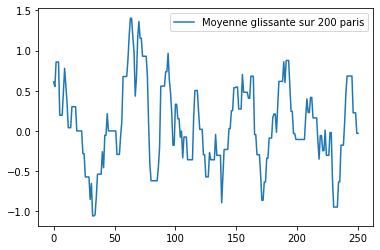

In [491]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
plt.plot(moving_average(gain_net_algo,10), label="Moyenne glissante sur 200 paris")
plt.legend()

print("Moyenne gain_net_algo sur 10 matchs = ", np.mean(moving_average(gain_net_algo,10)))
print("STD_DEV gain_net_algo sur 10 matchs = ", np.std(moving_average(gain_net_algo,10)))